<p>Name: Pratik Vairat</p>
<p>Roll No.: 57</p>
<p>Lab.: ML Lab 1</p>

<h2>Problem Statement</h2>

<p>Download temperature data from below link. <a href="https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.csv">temperatures.csv</a>
This data consists of temperatures of INDIA averaging the temperatures of all places month
wise. Temperatures values are recorded in CELSIUS</p>
<br>
<ol>
<li> Apply Linear Regression using suitable library function and predict the Month-wise</li>
temperature.
<li> Assessthe performance of regression models using MSE, MAE and R-Square metrics</li>
<li> Visualize simple regression model.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Import and anlysis dataset</h3>

In [2]:
df=pd.read_csv("temperatures.csv")

In [3]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [4]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [5]:
df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03
116,2017,26.45,29.46,31.60,34.95,35.84,33.82,31.88,31.72,32.22,32.29,29.60,27.18,31.42,27.95,34.13,32.41,29.69


In [6]:
df.size

2106

In [7]:
df.shape

(117, 18)

In [8]:
X=df[['YEAR']].values
X

array([[1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [19

In [9]:
Y=df[['ANNUAL']].values
Y

array([[28.96],
       [29.22],
       [28.47],
       [28.49],
       [28.3 ],
       [28.73],
       [28.65],
       [28.83],
       [28.38],
       [28.53],
       [28.62],
       [28.95],
       [28.67],
       [28.66],
       [28.94],
       [28.82],
       [28.11],
       [28.66],
       [28.66],
       [28.76],
       [28.86],
       [28.8 ],
       [28.74],
       [28.8 ],
       [28.67],
       [28.7 ],
       [28.59],
       [28.98],
       [28.76],
       [28.65],
       [29.15],
       [29.09],
       [28.49],
       [29.03],
       [28.76],
       [28.71],
       [28.7 ],
       [28.7 ],
       [28.85],
       [28.88],
       [29.46],
       [28.98],
       [28.8 ],
       [28.89],
       [28.97],
       [29.37],
       [28.84],
       [28.73],
       [28.89],
       [28.47],
       [29.09],
       [29.16],
       [29.43],
       [28.92],
       [28.76],
       [28.63],
       [28.64],
       [29.34],
       [29.02],
       [29.31],
       [28.72],
       [28.89],
       [

<h3>Plot the graph</h3>

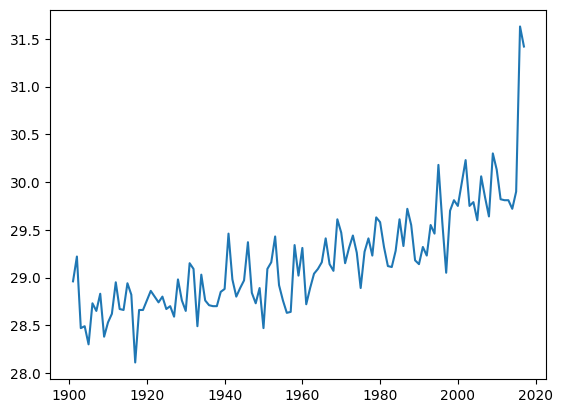

In [10]:
plt.plot(X,Y)

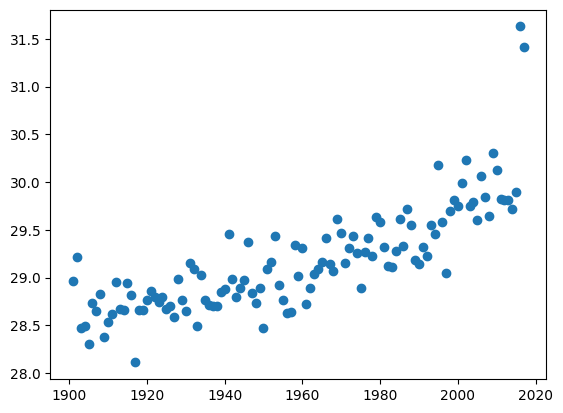

In [11]:
plt.plot(X,Y,'o')

In [12]:
from sklearn.linear_model import LinearRegression

<h3>Train and split data</h3>

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [15]:
X_train

array([[1909],
       [1976],
       [2004],
       [2014],
       [1980],
       [1926],
       [1955],
       [2017],
       [1913],
       [1960],
       [1949],
       [1950],
       [1978],
       [1992],
       [1906],
       [1979],
       [1973],
       [1917],
       [2002],
       [2008],
       [1983],
       [1974],
       [1932],
       [1927],
       [1908],
       [1912],
       [1943],
       [2009],
       [1952],
       [1933],
       [2001],
       [2013],
       [1954],
       [1964],
       [1941],
       [1986],
       [1984],
       [2015],
       [1998],
       [1945],
       [1969],
       [1940],
       [1902],
       [1923],
       [1901],
       [1977],
       [1953],
       [1947],
       [1937],
       [1956],
       [2000],
       [2010],
       [1966],
       [1916],
       [1995],
       [2006],
       [1972],
       [1905],
       [2011],
       [1930],
       [1981],
       [1907],
       [1920],
       [1944],
       [1994],
       [2007],
       [19

In [16]:
X_train.size

87

In [17]:
X_test.size

30

<h3>Linear Regression</h3>

In [18]:
model=LinearRegression()

In [19]:
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
Y_pred=model.predict(X_test)
Y_pred

array([[29.22196776],
       [29.52022904],
       [29.75365091],
       [29.77958667],
       [29.17009623],
       [29.58506845],
       [29.18306412],
       [29.5461648 ],
       [29.01448165],
       [28.59950944],
       [29.32571082],
       [28.46983062],
       [28.85886707],
       [29.20899988],
       [28.79402767],
       [29.07932106],
       [28.45686274],
       [28.65138097],
       [28.5606058 ],
       [29.57210057],
       [29.29977505],
       [29.3386787 ],
       [29.92223337],
       [29.62397209],
       [28.61247732],
       [28.69028461],
       [28.9107386 ],
       [29.4813254 ],
       [29.87036185],
       [29.15712835]])

In [21]:
model.coef_

array([[0.01296788]])

<h3>Model Evaluation</h3>

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [23]:
print(f"MBE: {mean_absolute_error(Y_test,Y_pred)}")

MBE: 0.23874635002509284


In [24]:
print(f"MSE: {mean_squared_error(Y_test,Y_pred)}")

MSE: 0.1535068209196785


In [25]:
print(f"r2: {r2_score(Y_test,Y_pred)}")

r2: 0.5703758171430602


<h3>Scatter Plot</h3>

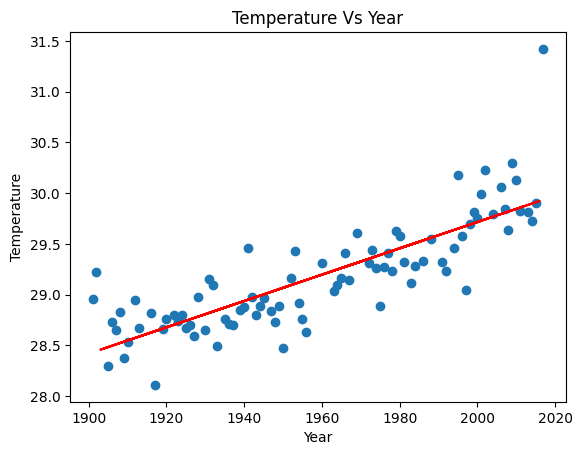

In [26]:
plt.scatter(X_train,Y_train)
plt.plot(X_test,Y_pred,color="red")
plt.title("Temperature Vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

<h3>Regression Plot</h3>

In [27]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import seaborn as sns

<Axes: >

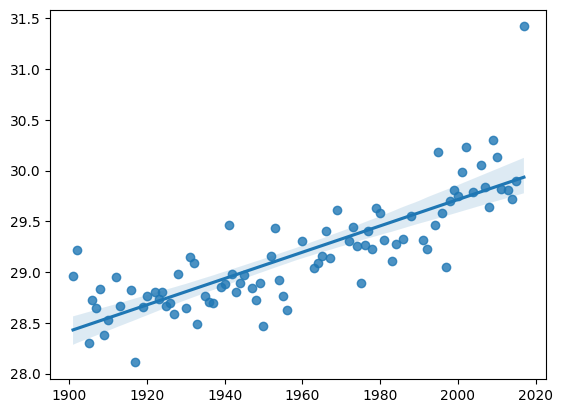

In [29]:
sns.regplot(data=df,x=X_train,y=Y_train)